<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningPython/blob/main/Tutorial_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear em Python 

In [9]:
# carregando os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregando a base de dados

#fonte: https://www.kaggle.com/datasets/ashydv/advertising-dataset?resource=download

data = pd.read_csv("/content/advertising.csv")

# Exibindo as 5 primeias linhas do dataframe
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
display(data.head(5))

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
# Marcando os máximos de cada coluna

# É possivel dizer que o mácimo de anúncio esta relacionado com o máximo de vendas?
data.style.highlight_max()

,TV,Radio,Newspaper,Sales
0,230.100000,37.800000,69.200000,22.100000
1,44.500000,39.300000,45.100000,10.400000
2,17.200000,45.900000,69.300000,12.000000
3,151.500000,41.300000,58.500000,16.500000
4,180.800000,10.800000,58.400000,17.900000
5,8.700000,48.900000,75.000000,7.200000
6,57.500000,32.800000,23.500000,11.800000
7,120.200000,19.600000,11.600000,13.200000
8,8.600000,2.100000,1.000000,4.800000
9,199.800000,2.600000,21.200000,15.600000


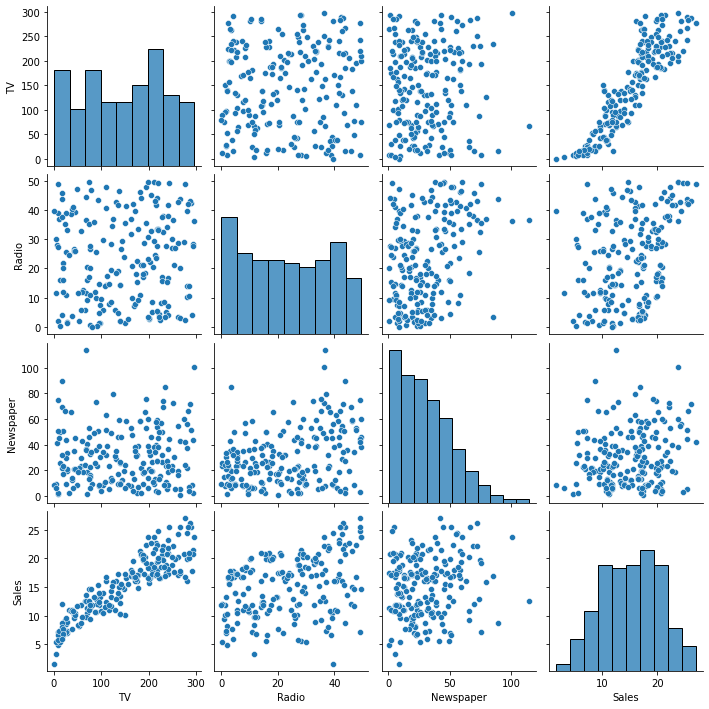

In [15]:
# faazendo um plot das correlaçoes existentes

sns.pairplot(data)


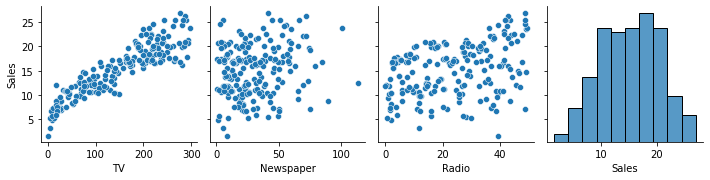

In [16]:
sns.pairplot(data,
             x_vars=["TV", "Newspaper","Radio", "Sales"],
             y_vars=["Sales"],)

# Statsmodels

In [17]:
import statsmodels.api as sm
y = "Sales"

In [20]:
data.drop([y], axis=1).head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Fazendo a interpolação com todos os dados juntos

In [25]:
modelo_sm = sm.OLS(data[y], data.drop([y], axis=1))
res = modelo_sm.fit()
print(res.params)
# print(res.summary())

TV           0.067079
Radio        0.160033
Newspaper    0.028433
dtype: float64


## Fazendo a interporlação só usando os dados da TV

In [24]:
modelo_sm_TV = sm.OLS(data[y], data['TV'])
res_TV = modelo_sm_TV.fit()
print(res_TV.params)
# print(res_TV.summary())

TV    0.090884
dtype: float64


In [29]:
data['Ajuste'] = data['TV'] * 0.090884

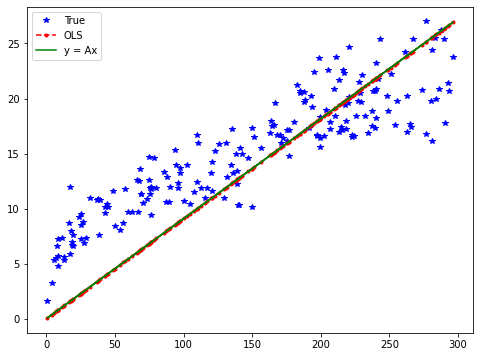

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['TV'], data[y], "b*", label="True")
ax.plot(data['TV'], res_TV.fittedvalues, "r--.", label="OLS")
ax.plot(data['TV'], data['Ajuste'], "g-", label="y = Ax")
ax.legend(loc="best")

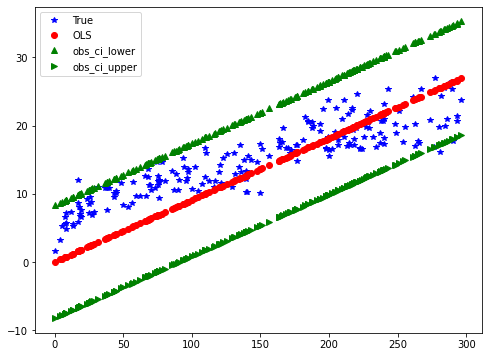

In [51]:
pred_ols = res_TV.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
x = data['TV']
ax.plot(x, data[y], "b*", label="True")
ax.plot(x, res_TV.fittedvalues, "ro", label="OLS")
ax.plot(x, iv_u, "g^", label= "obs_ci_lower")
ax.plot(x, iv_l, "g>", label= "obs_ci_upper")
ax.legend(loc="best")

#### OBS: Caso não consiga fazer a regressão usando os dados escalados, vale a pena fazer a transformação de escala dos dados

In [50]:
from sklearn.preprocessing import MinMaxScaler
# prepare data for normalization
X = data['TV'].values
X = X.reshape((len(X), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_X = scaler.fit_transform(X)
modelo_norm = sm.OLS(data[y], normalized_X)
res_norm = modelo_norm.fit()
print(res_norm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              2676.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                   2.30e-117
Time:                        00:55:46   Log-Likelihood:                         -571.52
No. Observations:                 200   AIC:                                      1145.
Df Residuals:                     199   BIC:                                      1148.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

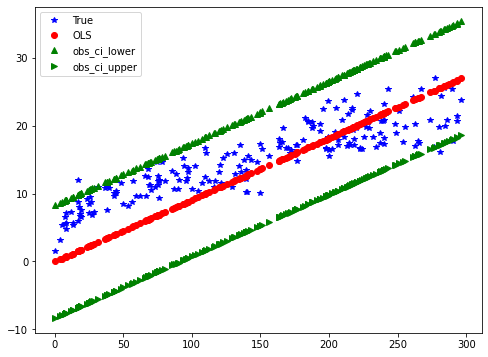

In [53]:
pred_ols = res_norm.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
x = data['TV']
ax.plot(x, data[y], "b*", label="True")
ax.plot(x, res_norm.fittedvalues, "ro", label="OLS")
ax.plot(x, iv_u, "g^", label= "obs_ci_lower")
ax.plot(x, iv_l, "g>", label= "obs_ci_upper")
ax.legend(loc="best")

## Usando Scikit-learn

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data['TV'].values.reshape((len(X), 1))

Xtrain, Xval, ytrain, yval = train_test_split(X, data[y], test_size=0.3, random_state=0)
print(Xtrain.shape, Xval.shape, ytrain.shape, yval.shape)

modelo = LinearRegression(normalize=True)
modelo.fit(Xtrain, ytrain)

p = modelo.predict(Xval)

(140, 1) (60, 1) (140,) (60,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [57]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(yval, p))

2.3599871172248466

In [58]:
modelo.coef_

array([0.05473199])

In [59]:
data['Ajuste_2'] = data['TV'] * 0.05473199

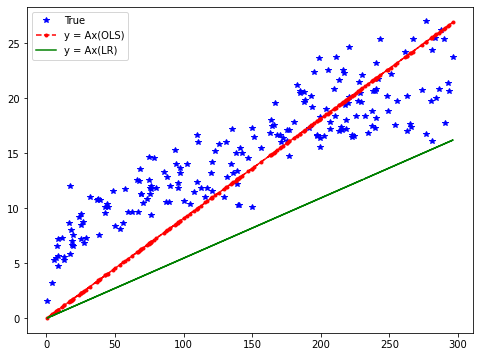

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['TV'], data[y], "b*", label="True")
ax.plot(data['TV'], data['Ajuste'], "r--.", label="y = Ax(OLS)")
ax.plot(data['TV'], data['Ajuste_2'], "g-", label="y = Ax(LR)")
ax.legend(loc="best")

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['TV'].values.reshape((len(X), 1))

Xtrain, Xval, ytrain, yval = train_test_split(X, data[y], test_size=0.3, random_state=0)
print(Xtrain.shape, Xval.shape, ytrain.shape, yval.shape)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

modelo = LinearRegression(fit_intercept=True, normalize=False)
modelo.fit(Xtrain_scaled, ytrain)

p = modelo.predict(Xval_scaled)

(140, 1) (60, 1) (140,) (60,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [62]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(yval, p))

2.359987117224847

In [63]:
modelo.coef_

array([4.59229292])